In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- Age, Cabin and Embarked contain null values in the training set. These will have to be replaced before making any predictions.
- Age, Cabin and Fare contain null values in the test set. We need to replace these too. 

In [7]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


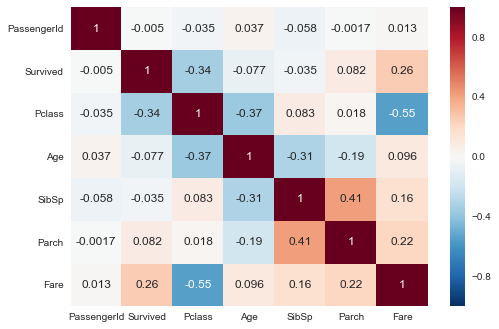

In [9]:
#fig = plt.figure(figsize=(15,10))
sns.heatmap(titanic.corr(),annot=True)
plt.show()

## Visualizing "Pclass"

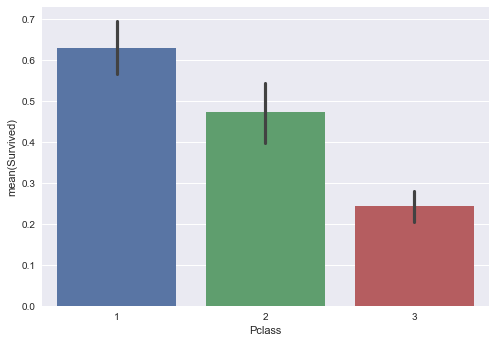

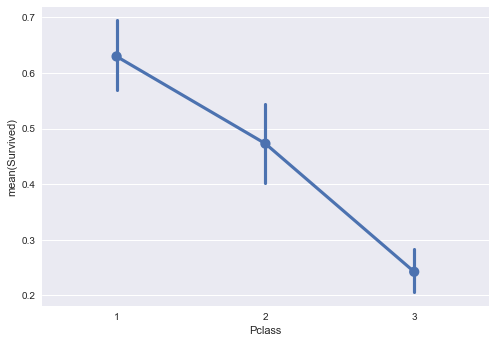

In [10]:
sns.barplot(x="Pclass", y="Survived",data=titanic)
plt.show()
sns.pointplot(x="Pclass", y="Survived",data=titanic)
plt.show()

- From the above, it can be concluded, individuals from Pclass one survived the most.
- This feature should be taken into the prediction model.

## Visualizing "Sex"

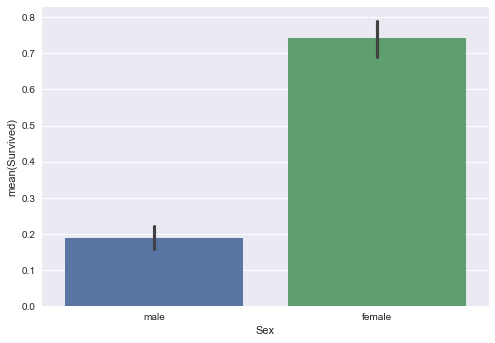

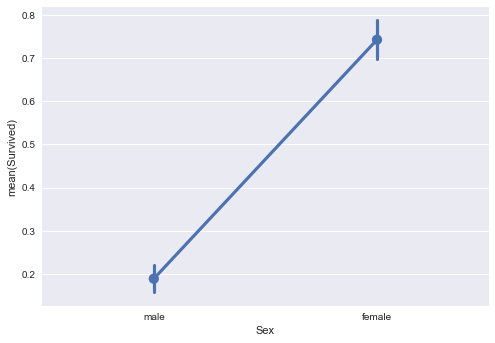

In [11]:
sns.barplot(x="Sex", y="Survived",data=titanic)
plt.show()
sns.pointplot(x="Sex", y="Survived",data=titanic)
plt.show()

- Females survived significantly more than males.
- Consider this feature in the predictive model.

## Visualizing "Age"

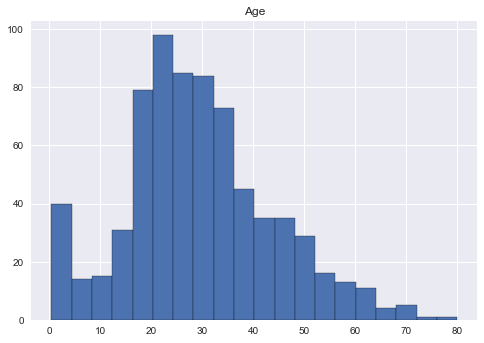

In [12]:
titanic.hist("Age",bins=20,edgecolor="black")
plt.show()

In [13]:
titanic["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

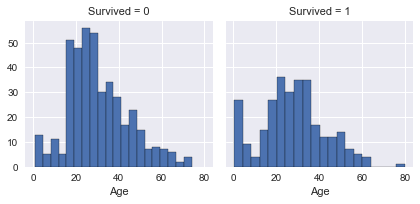

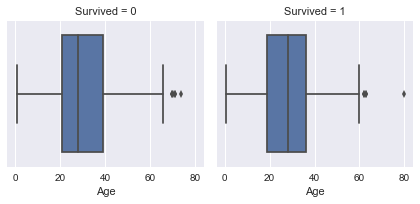

In [14]:
g = sns.FacetGrid(titanic, col="Survived")
g.map(plt.hist,"Age",edgecolor='black',bins=20)
plt.show()
g = sns.FacetGrid(titanic, col="Survived")
g.map(sns.boxplot,"Age")
plt.show()

- Based on the above visualizations, Age can be divided into the following age groups.

In [15]:
age1 = (titanic["Age"]>0) & (titanic["Age"]<=12)
age2 = (titanic["Age"]>12) & (titanic["Age"]<=20)
age3 = (titanic["Age"]>20) & (titanic["Age"]<=40)
age4 = (titanic["Age"]>40) & (titanic["Age"]<=50)
age5 = (titanic["Age"]>50) & (titanic["Age"]<=63)
age6 = (titanic["Age"]>63)

In [16]:
titanic.loc[age1,"AgeGroup"] = 1
titanic.loc[age2,"AgeGroup"] = 2
titanic.loc[age3,"AgeGroup"] = 3
titanic.loc[age4,"AgeGroup"] = 4
titanic.loc[age5,"AgeGroup"] = 5
titanic.loc[age6,"AgeGroup"] = 6

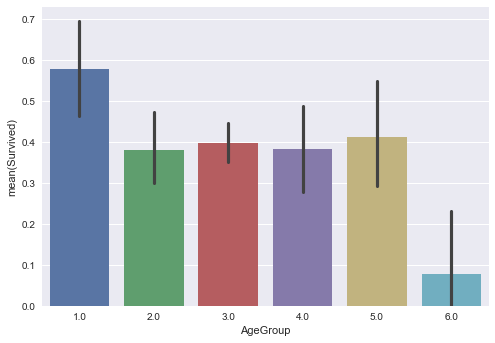

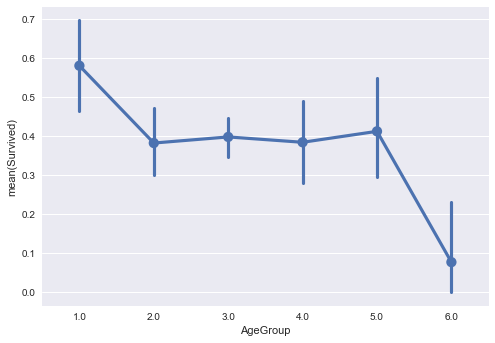

In [17]:
sns.barplot(x="AgeGroup", y="Survived", data=titanic)
plt.show()
sns.pointplot(x="AgeGroup", y="Survived", data=titanic)
plt.show()

- This new feature 'AgeGroup' should be considered in the predictive model. Drop the original feature 'Age'.

## Visualizing "SibSp" & "Parch"

Let's create a new feature out of this called "Familysize"

In [18]:
titanic["Familysize"] = titanic["SibSp"]+titanic["Parch"]+1 

In [19]:
titanic["Familysize"].value_counts().sort_values()

8       6
11      7
7      12
5      15
6      22
4      29
3     102
2     161
1     537
Name: Familysize, dtype: int64

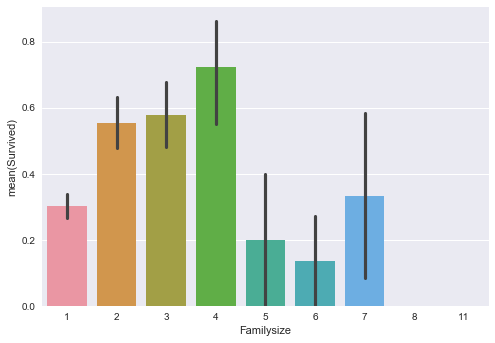

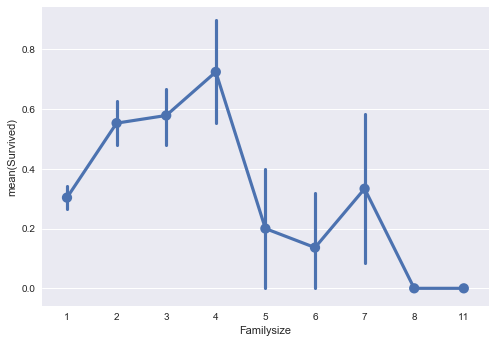

In [20]:
sns.barplot(x="Familysize", y="Survived", data=titanic)
plt.show()
sns.pointplot(x="Familysize", y="Survived", data=titanic)
plt.show()

Let's divide Familysize into two groups of Familysize<=4 and Familysize>4, since the likelihood of survival looks good for the individual with the former.

In [21]:
fz1 = (titanic["Familysize"]==1)
fz2 = (titanic["Familysize"]>1) & (titanic["Familysize"]<=4)
fz3 = (titanic["Familysize"]>4)
titanic.loc[fz1,"Familysizegrp"] = 1
titanic.loc[fz2,"Familysizegrp"] = 2
titanic.loc[fz3,"Familysizegrp"] = 3

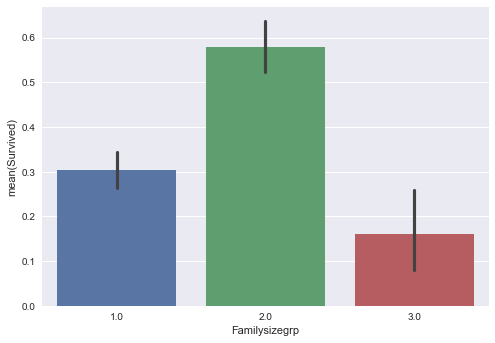

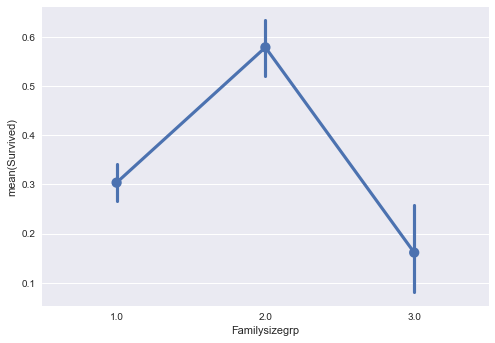

In [22]:
sns.barplot(x="Familysizegrp",y="Survived",data=titanic)
plt.show()
sns.pointplot(x="Familysizegrp",y="Survived",data=titanic)
plt.show()

- Include the feature "Familysizegrp" in the predictive model. Drop "SibSp", "Parch" and "Familysize"

In [23]:
test["Familysize"] = test["SibSp"]+test["Parch"]+1
fz1 = (test["Familysize"]==1)
fz2 = (test["Familysize"]>1) & (test["Familysize"]<=4)
fz3 = (test["Familysize"]>4)

In [24]:
test.loc[fz1,"Familysizegrp"] = 1
test.loc[fz2,"Familysizegrp"] = 2
test.loc[fz3,"Familysizegrp"] = 3

## Visualizing "Fare"

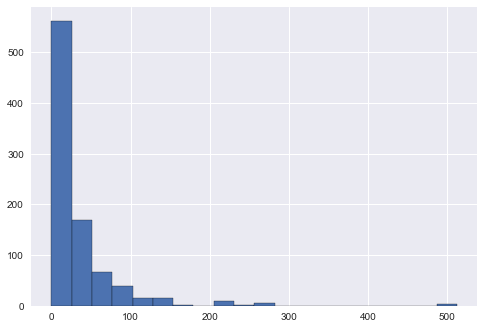

In [25]:
titanic["Fare"].hist(bins=20, edgecolor='black')
plt.show()

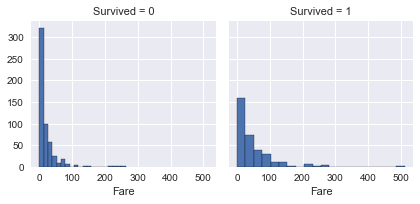

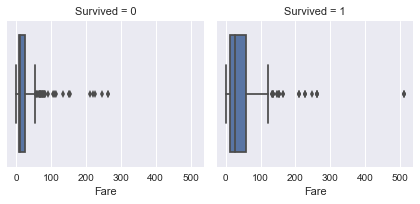

In [26]:
h = sns.FacetGrid(titanic, col="Survived")
h.map(plt.hist, "Fare", edgecolor='black', bins=20)
plt.show()
h = sns.FacetGrid(titanic, col="Survived")
h.map(sns.boxplot, "Fare")
plt.show()

In [27]:
#Normalizing this feature
from scipy.stats import boxcox

In [28]:
titanic["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [29]:
test["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [30]:
titanic.loc[titanic["Fare"] == 0, "Fare"] = 0.000001

In [31]:
titanic["transFare"]=boxcox(list(titanic["Fare"]))[0]

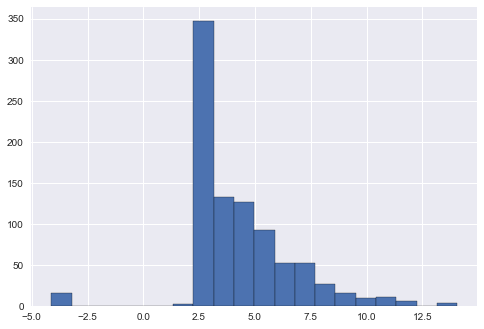

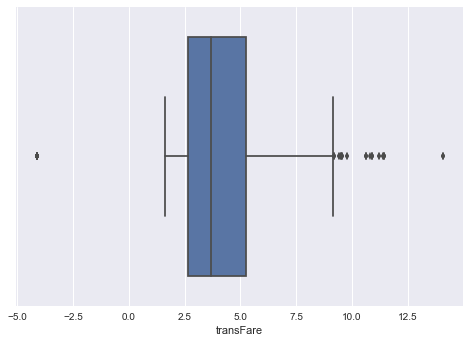

In [32]:
titanic["transFare"].hist(bins=20, edgecolor='black')
plt.show()
sns.boxplot('transFare',data=titanic)
plt.show()

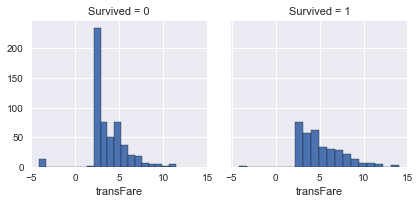

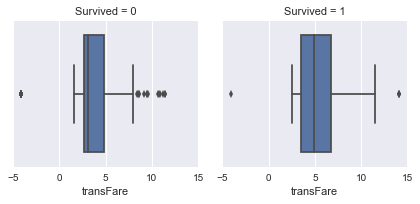

In [33]:
j = sns.FacetGrid(titanic, col="Survived")
j.map(plt.hist, "transFare", edgecolor='black', bins=20)
plt.show()
j = sns.FacetGrid(titanic, col="Survived")
j.map(sns.boxplot, "transFare")
plt.show()

In [34]:
titanic[(titanic['transFare']>7.5)]["Survived"].value_counts()

1    72
0    23
Name: Survived, dtype: int64

From the above analysis, fare can be divided into three categories
- 1 - transFare less than or equal to 2.5
- 2 - transFare greater than 2.5 and less than or equal to 7.5
- 3 - transFare greater than 7.5

In [35]:
titanic.loc[(titanic['transFare']<=2.5), 'Faregrp'] = 1
titanic.loc[(titanic['transFare']>2.5) & (titanic['transFare']<=7.5), 'Faregrp'] = 2
titanic.loc[(titanic['transFare']>7.5), 'Faregrp'] = 3

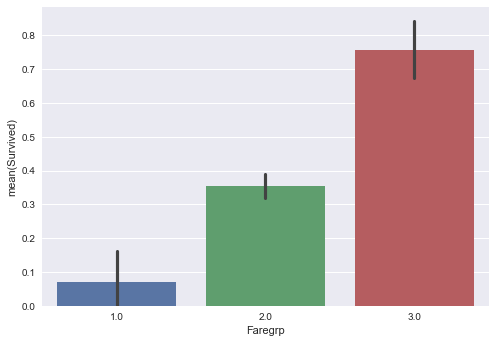

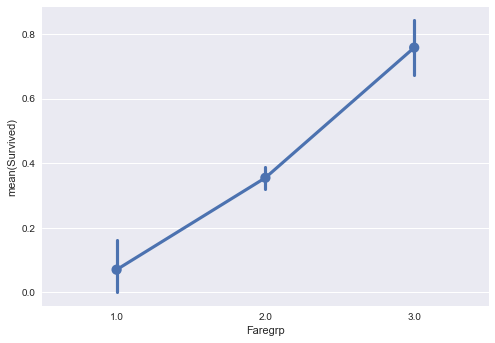

In [36]:
sns.barplot(x='Faregrp', y='Survived', data=titanic)
plt.show()
sns.pointplot(x='Faregrp', y='Survived', data=titanic)
plt.show()

In [37]:
test["Fare"].fillna(test["Fare"].median(), inplace=True)

In [38]:
test.loc[test["Fare"] == 0, "Fare"] = 0.000001
test["transFare"]=boxcox(list(test["Fare"]))[0]
test.loc[(test['transFare']<=2.5), 'Faregrp'] = 1
test.loc[(test['transFare']>2.5) & (test['transFare']<=7.5), 'Faregrp'] = 2
test.loc[(test['transFare']>7.5), 'Faregrp'] = 3

## Visualizing "Embarked"

- Embarked has a few null values. These need to be replaced.
- Replace the null values with the category that occurs the most. 

In [39]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [40]:
titanic["Embarked"].fillna('S', inplace=True)

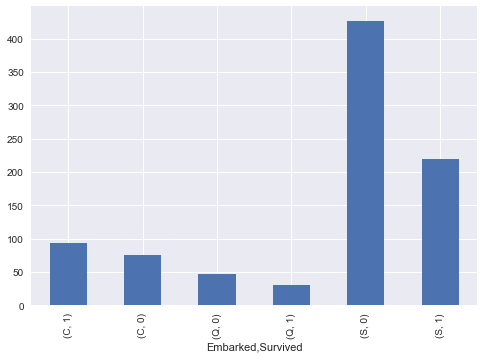

In [41]:
titanic.groupby("Embarked").Survived.value_counts().plot(kind="bar")
plt.show()

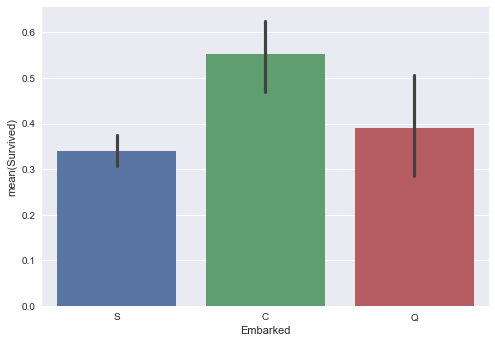

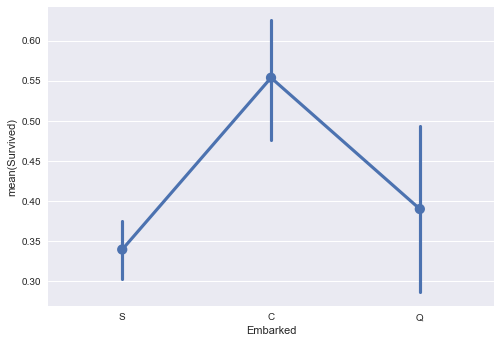

In [42]:
sns.barplot(x='Embarked', y='Survived', data=titanic)
plt.show()
sns.pointplot(x='Embarked', y='Survived', data=titanic)
plt.show()

## Visualizing "Cabin"

In [43]:
titanic["Cabin"] = titanic["Cabin"].astype(str)

In [44]:
titanic["Deck"] = ""
for i in range(len(titanic)):
    titanic["Deck"].iloc[i] = titanic["Cabin"].iloc[i][:1]

C:\Users\Ravish\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
titanic["Deck"].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

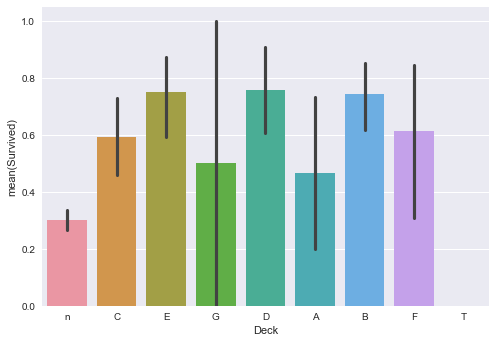

In [46]:
sns.barplot(x='Deck', y='Survived', data=titanic)
plt.show()

In [47]:
test["Cabin"] = test["Cabin"].astype(str)
test["Deck"] = ""
for i in range(len(test)):
    test["Deck"].iloc[i] = test["Cabin"].iloc[i][:1]

C:\Users\Ravish\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
test["Deck"].value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Deck, dtype: int64

## Visualizing "Name"

In [49]:
list(titanic["Name"])

['Braund, Mr. Owen Harris',
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
 'Heikkinen, Miss. Laina',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Allen, Mr. William Henry',
 'Moran, Mr. James',
 'McCarthy, Mr. Timothy J',
 'Palsson, Master. Gosta Leonard',
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
 'Nasser, Mrs. Nicholas (Adele Achem)',
 'Sandstrom, Miss. Marguerite Rut',
 'Bonnell, Miss. Elizabeth',
 'Saundercock, Mr. William Henry',
 'Andersson, Mr. Anders Johan',
 'Vestrom, Miss. Hulda Amanda Adolfina',
 'Hewlett, Mrs. (Mary D Kingcome) ',
 'Rice, Master. Eugene',
 'Williams, Mr. Charles Eugene',
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
 'Masselmani, Mrs. Fatima',
 'Fynney, Mr. Joseph J',
 'Beesley, Mr. Lawrence',
 'McGowan, Miss. Anna "Annie"',
 'Sloper, Mr. William Thompson',
 'Palsson, Miss. Torborg Danira',
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
 'Emir, Mr. Farred Chehab',
 'Fortune, Mr. Charles Alexander',
 '

In [50]:
import re

In [51]:
#Get the list of Name Titles using regular expression
titles=list()
for name in list(titanic["Name"]):
    y = re.search(r'\s\w+\.',name).group(0)
    y = y.replace(" ","")
    y = y.replace(".","")
    titles.append(y)

In [52]:
titanic["Title"] = titles

In [53]:
titanic["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Mme           1
Countess      1
Capt          1
Sir           1
Jonkheer      1
Lady          1
Don           1
Ms            1
Name: Title, dtype: int64

In [54]:
#Replace Mlle. with Miss.
#Replace Ms. with Miss.
#Replace Mme. with Mrs.

In [55]:
titanic["Title"].replace(to_replace="Mlle", value="Miss", inplace=True)
titanic["Title"].replace(to_replace="Ms", value="Miss", inplace=True)
titanic["Title"].replace(to_replace="Mme", value="Mrs", inplace=True)

In [56]:
titanic["Title"].value_counts()

Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Col           2
Major         2
Capt          1
Countess      1
Sir           1
Jonkheer      1
Lady          1
Don           1
Name: Title, dtype: int64

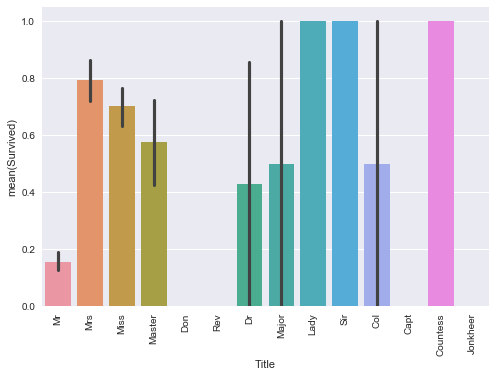

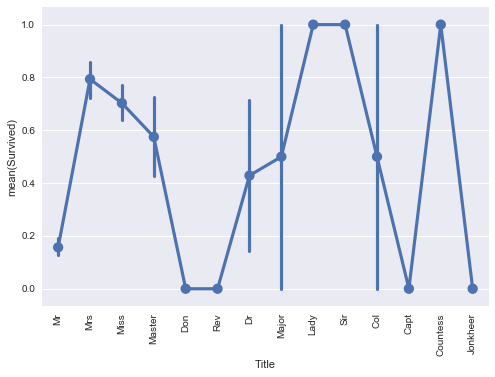

In [57]:
sns.barplot(x='Title', y='Survived', data=titanic)
plt.xticks(rotation=90)
plt.show()
sns.pointplot(x='Title', y='Survived', data=titanic)
plt.xticks(rotation=90)
plt.show()

In [58]:
titles=list()
for name in list(test["Name"]):
    y = re.search(r'\s\w+\.',name).group(0)
    y = y.replace(" ","")
    y = y.replace(".","")
    titles.append(y)

test["Title"] = titles

In [59]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [60]:
test["Title"].replace(to_replace="Dona", value="Don", inplace=True)
test["Title"].replace(to_replace="Ms", value="Miss", inplace=True)

In [61]:
#Giving numeric representations to feature "Title" in a new feature "Title_num"
titanic["Title"] = pd.Categorical(titanic["Title"])
titanic["Title_num"] = titanic["Title"].cat.codes

In [62]:
dict(enumerate(titanic["Title"].cat.categories))

{0: 'Capt',
 1: 'Col',
 2: 'Countess',
 3: 'Don',
 4: 'Dr',
 5: 'Jonkheer',
 6: 'Lady',
 7: 'Major',
 8: 'Master',
 9: 'Miss',
 10: 'Mr',
 11: 'Mrs',
 12: 'Rev',
 13: 'Sir'}

In [63]:
#Inverting this dictionary
title_map = {i:j for j, i in dict(enumerate(titanic["Title"].cat.categories)).items()}

In [64]:
title_map

{'Capt': 0,
 'Col': 1,
 'Countess': 2,
 'Don': 3,
 'Dr': 4,
 'Jonkheer': 5,
 'Lady': 6,
 'Major': 7,
 'Master': 8,
 'Miss': 9,
 'Mr': 10,
 'Mrs': 11,
 'Rev': 12,
 'Sir': 13}

In [65]:
test["Title_num"] = test["Title"].map(title_map)

## Visualizing Tickets

In [66]:
list(titanic["Ticket"])

['A/5 21171',
 'PC 17599',
 'STON/O2. 3101282',
 '113803',
 '373450',
 '330877',
 '17463',
 '349909',
 '347742',
 '237736',
 'PP 9549',
 '113783',
 'A/5. 2151',
 '347082',
 '350406',
 '248706',
 '382652',
 '244373',
 '345763',
 '2649',
 '239865',
 '248698',
 '330923',
 '113788',
 '349909',
 '347077',
 '2631',
 '19950',
 '330959',
 '349216',
 'PC 17601',
 'PC 17569',
 '335677',
 'C.A. 24579',
 'PC 17604',
 '113789',
 '2677',
 'A./5. 2152',
 '345764',
 '2651',
 '7546',
 '11668',
 '349253',
 'SC/Paris 2123',
 '330958',
 'S.C./A.4. 23567',
 '370371',
 '14311',
 '2662',
 '349237',
 '3101295',
 'A/4. 39886',
 'PC 17572',
 '2926',
 '113509',
 '19947',
 'C.A. 31026',
 '2697',
 'C.A. 34651',
 'CA 2144',
 '2669',
 '113572',
 '36973',
 '347088',
 'PC 17605',
 '2661',
 'C.A. 29395',
 'S.P. 3464',
 '3101281',
 '315151',
 'C.A. 33111',
 'CA 2144',
 'S.O.C. 14879',
 '2680',
 '1601',
 '348123',
 '349208',
 '374746',
 '248738',
 '364516',
 '345767',
 '345779',
 '330932',
 '113059',
 'SO/C 14885',
 '310

In [67]:
re.search(r'.+\s',list(titanic["Ticket"])[0]).group(0)

'A/5 '

In [68]:
tkt_type=list()
for typ in list(titanic["Ticket"]):
    z = re.search(r'.+\s',typ)
    if z is None:
        tkt_type.append('REG')
    else:
        z = z.group(0)
        z = z.replace(" ","")
        z = z.replace(".","")
        z = z.upper()
        tkt_type.append(z)

In [69]:
titanic["Tickettype"] = tkt_type

In [70]:
titanic["Tickettype"].value_counts()

REG           665
PC             60
CA             41
A/5            19
STON/O2        18
SOTON/OQ       15
SC/PARIS       11
W/C            10
A/4             6
SOC             5
FCC             5
C               5
SO/PP           3
PP              3
WE/P            2
SW/PP           2
SOTON/O2        2
P/PP            2
A5              2
SC/AH           2
SC              1
FA              1
WEP             1
SC/A4           1
A4              1
FC              1
CA/SOTON        1
SC/AHBASLE      1
SOP             1
SP              1
A/S             1
SCO/W           1
SO/C            1
Name: Tickettype, dtype: int64

In [71]:
titanic["Tickettype"].replace(to_replace="A5", value="A/5", inplace=True)
titanic["Tickettype"].replace(to_replace="A/S", value="A/5", inplace=True)
titanic["Tickettype"].replace(to_replace="SOTON/O2", value="STON/O2", inplace=True)
titanic["Tickettype"].replace(to_replace="SO/C", value="SOC", inplace=True)
titanic["Tickettype"].replace(to_replace="A4", value="A/4", inplace=True)
titanic["Tickettype"].replace(to_replace="WEP", value="WE/P", inplace=True)

In [72]:
titanic["Tickettype"].value_counts().sort_index()

A/4             7
A/5            22
C               5
CA             41
CA/SOTON        1
FA              1
FC              1
FCC             5
P/PP            2
PC             60
PP              3
REG           665
SC              1
SC/A4           1
SC/AH           2
SC/AHBASLE      1
SC/PARIS       11
SCO/W           1
SO/PP           3
SOC             6
SOP             1
SOTON/OQ       15
SP              1
STON/O2        20
SW/PP           2
W/C            10
WE/P            3
Name: Tickettype, dtype: int64

In [73]:
titanic.groupby("Tickettype")["Fare"].median()

Tickettype
A/4            8.0500
A/5            8.0500
C              7.2500
CA            26.2500
CA/SOTON      10.5000
FA             7.3125
FC            52.0000
FCC           26.2500
P/PP          24.0000
PC            79.2000
PP            16.7000
REG           13.0000
SC            12.0000
SC/A4          8.0500
SC/AH         26.0000
SC/AHBASLE    13.7917
SC/PARIS      27.7208
SCO/W         12.2750
SO/PP         10.5000
SOC           73.5000
SOP           12.5250
SOTON/OQ       7.2500
SP             8.1583
STON/O2        7.9250
SW/PP         10.5000
W/C           23.4500
WE/P          71.0000
Name: Fare, dtype: float64

In [74]:
titanic.groupby("Tickettype")["Fare"].describe(percentiles=[0.5])[120:]

Tickettype       
SOP         count     1.000000
            mean     12.525000
            std            NaN
            min      12.525000
            50%      12.525000
            max      12.525000
SOTON/OQ    count    15.000000
            mean      7.530000
            std       0.505964
            min       7.050000
            50%       7.250000
            max       8.050000
SP          count     1.000000
            mean      8.158300
            std            NaN
            min       8.158300
            50%       8.158300
            max       8.158300
STON/O2     count    20.000000
            mean      8.557500
            std       2.514904
            min       7.125000
            50%       7.925000
            max      15.850000
SW/PP       count     2.000000
            mean     10.500000
            std       0.000000
            min      10.500000
            50%      10.500000
            max      10.500000
W/C         count    10.000000
            mean     

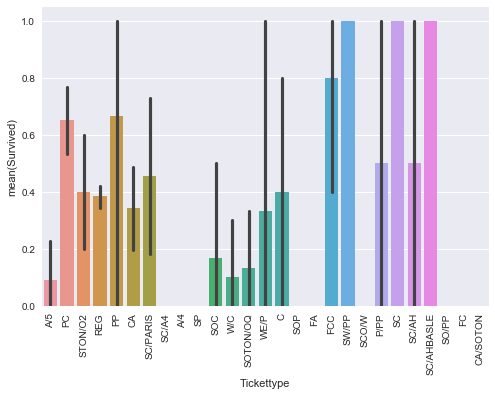

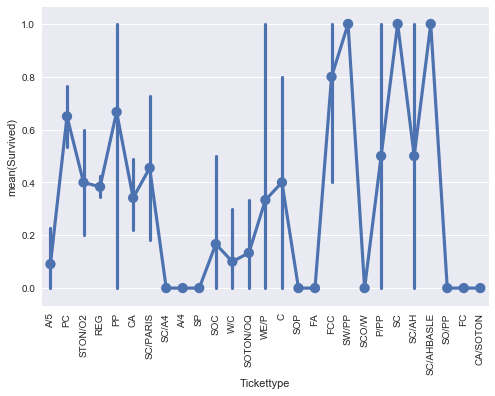

In [75]:
sns.barplot(x='Tickettype', y='Survived', data=titanic)
plt.xticks(rotation=90)
plt.show()
sns.pointplot(x='Tickettype', y='Survived', data=titanic)
plt.xticks(rotation=90)
plt.show()

In [76]:
list(test["Ticket"])

['330911',
 '363272',
 '240276',
 '315154',
 '3101298',
 '7538',
 '330972',
 '248738',
 '2657',
 'A/4 48871',
 '349220',
 '694',
 '21228',
 '24065',
 'W.E.P. 5734',
 'SC/PARIS 2167',
 '233734',
 '2692',
 'STON/O2. 3101270',
 '2696',
 'PC 17603',
 'C 17368',
 'PC 17598',
 'PC 17597',
 'PC 17608',
 'A/5. 3337',
 '113509',
 '2698',
 '113054',
 '2662',
 'SC/AH 3085',
 'C.A. 31029',
 'C.A. 2315',
 'W./C. 6607',
 '13236',
 '2682',
 '342712',
 '315087',
 '345768',
 '1601',
 '349256',
 '113778',
 'SOTON/O.Q. 3101263',
 '237249',
 '11753',
 'STON/O 2. 3101291',
 'PC 17594',
 '370374',
 '11813',
 'C.A. 37671',
 '13695',
 'SC/PARIS 2168',
 '29105',
 '19950',
 'SC/A.3 2861',
 '382652',
 '349230',
 '348122',
 '386525',
 'PC 17608',
 '349232',
 '237216',
 '347090',
 '334914',
 'PC 17608',
 'F.C.C. 13534',
 '330963',
 '113796',
 '2543',
 '19950',
 '382653',
 '349211',
 '3101297',
 'PC 17562',
 '113503',
 '113503',
 '359306',
 '11770',
 '248744',
 '368702',
 '2678',
 'PC 17483',
 '19924',
 '349238',
 

In [77]:
tkt_type1=list()
for typ in list(test["Ticket"]):
    z = re.search(r'.+\s',typ)
    if z is None:
        tkt_type1.append('REG')
    else:
        z = z.group(0)
        z = z.replace(" ","")
        z = z.replace(".","")
        z = z.upper()
        tkt_type1.append(z)
        
test["Tickettype"] = tkt_type1

In [78]:
test["Tickettype"].value_counts().sort_index()

A/4           3
A/5           6
A2            1
A5            1
AQ/3          1
AQ/4          1
C             3
CA           27
FC            2
FCC           4
LP            1
PC           32
PP            1
REG         296
SC            1
SC/A3         1
SC/A4         1
SC/AH         2
SC/PARIS      8
SO/PP         4
SOC           2
SOTON/O2      1
SOTON/OQ      9
STON/O2       3
STON/OQ       1
W/C           5
WEP           1
Name: Tickettype, dtype: int64

In [79]:
test["Tickettype"].replace(to_replace="SOTON/O2", value="STON/O2", inplace=True)
test["Tickettype"].replace(to_replace="STON/OQ", value="SOTON/OQ", inplace=True)
test["Tickettype"].replace(to_replace="A5", value="A/5", inplace=True)
test["Tickettype"].replace(to_replace="WEP", value="WE/P", inplace=True)

In [80]:
test.groupby("Tickettype")["Fare"].describe(percentiles=[0.5])[120:]

Tickettype       
SOTON/OQ    count    10.000000
            mean      9.387500
            std       3.050643
            min       7.050000
            50%       7.950000
            max      13.775000
STON/O2     count     4.000000
            mean      7.925000
            std       0.000000
            min       7.925000
            50%       7.925000
            max       7.925000
W/C         count     5.000000
            mean     20.455000
            std      10.123123
            min      10.500000
            50%      23.450000
            max      34.375000
WE/P        count     1.000000
            mean     61.175000
            std            NaN
            min      61.175000
            50%      61.175000
            max      61.175000
Name: Fare, dtype: float64

In [81]:
rep_A = ['FA', 'A/4', 'A/5', 'A2', 'AQ/3', 'AQ/4', 'LP']
rep_S = ['SC', 'SC/A4', 'SC/AH', 'SC/AHBASLE', 'SCO/W', 'SO/PP', 'SC/A3', 'SOP', 'SP', 'SW/PP']

In [82]:
for itm in rep_A:
    test["Tickettype"].replace(to_replace=itm, value='A', inplace=True)
    titanic["Tickettype"].replace(to_replace=itm, value='A', inplace=True)
for itm in rep_S:
    test["Tickettype"].replace(to_replace=itm, value='S', inplace=True)
    titanic["Tickettype"].replace(to_replace=itm, value='S', inplace=True)

titanic["Tickettype"].replace(to_replace='CA', value='C', inplace=True)
titanic["Tickettype"].replace(to_replace='CA/SOTON', value='C', inplace=True)
test["Tickettype"].replace(to_replace='CA', value='C', inplace=True)
test["Tickettype"].replace(to_replace='CA/SOTON', value='C', inplace=True)

titanic["Tickettype"].replace(to_replace='PP', value='P', inplace=True)
titanic["Tickettype"].replace(to_replace='P/PP', value='P', inplace=True)
test["Tickettype"].replace(to_replace='PP', value='P', inplace=True)
test["Tickettype"].replace(to_replace='P/PP', value='P', inplace=True)

In [83]:
titanic["Tickettype"].value_counts()

REG         665
PC           60
C            47
A            30
STON/O2      20
SOTON/OQ     15
S            13
SC/PARIS     11
W/C          10
SOC           6
FCC           5
P             5
WE/P          3
FC            1
Name: Tickettype, dtype: int64

In [84]:
test["Tickettype"].value_counts()

REG         296
PC           32
C            30
A            14
SOTON/OQ     10
S             9
SC/PARIS      8
W/C           5
FCC           4
STON/O2       4
SOC           2
FC            2
P             1
WE/P          1
Name: Tickettype, dtype: int64

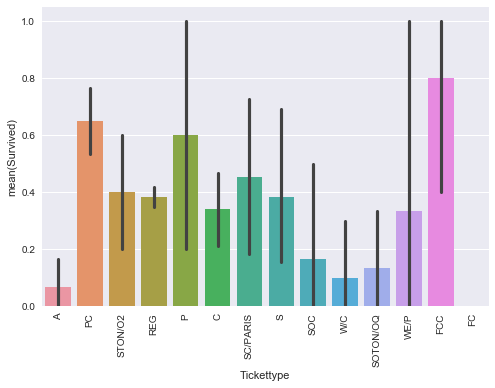

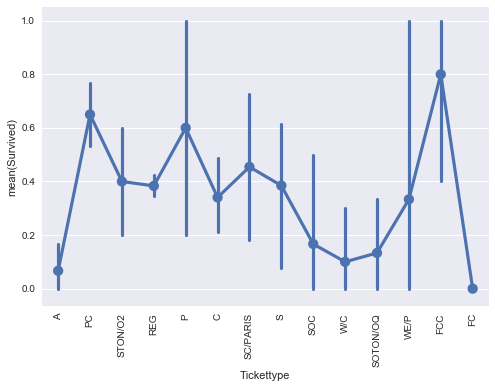

In [85]:
sns.barplot(x='Tickettype', y='Survived', data=titanic)
plt.xticks(rotation=90)
plt.show()
sns.pointplot(x='Tickettype', y='Survived', data=titanic)
plt.xticks(rotation=90)
plt.show()

This feature "Tickettype" can be used in the prediction model and has a potential to increase the accuracy. 

## AGE
- Age contains null values. Let's try to fill those in by making predictions using the other numerical columns.
- Linear regression can be used to fill up null values once appropriate features are selected. 

## Predicting the values of "Age" column that currently are NaN

In [86]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,AgeGroup,Familysize,Familysizegrp,transFare,Faregrp,Deck,Title,Title_num,Tickettype
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,3.0,2,2.0,2.516984,2.0,n,Mr,10,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,3.0,2,2.0,7.303128,2.0,C,Mrs,11,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,3.0,1,1.0,2.659645,2.0,n,Miss,9,STON/O2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,3.0,2,2.0,6.534568,2.0,C,Mrs,11,REG
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,3.0,1,1.0,2.685032,2.0,n,Mr,10,REG
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,NaN,1,1.0,2.765902,2.0,n,Mr,10,REG
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,5.0,1,1.0,6.475274,2.0,E,Mr,10,REG
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,1.0,5,3.0,4.438173,2.0,n,Master,8,REG
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,3.0,3,2.0,3.232415,2.0,n,Mrs,11,REG
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,2.0,2,2.0,5.191698,2.0,n,Mrs,11,REG


In [87]:
titanic.corr()["Age"]

PassengerId      0.036847
Survived        -0.077221
Pclass          -0.369226
Age              1.000000
SibSp           -0.308247
Parch           -0.189119
Fare             0.096067
AgeGroup         0.947301
Familysize      -0.301914
Familysizegrp   -0.249874
transFare        0.109979
Faregrp          0.090238
Title_num        0.174883
Name: Age, dtype: float64

- The features that seem helpful in making age predictions are, (Pclass, Familysize, transFare, Title_num)
- Let's combine both the data sets and make predictions on the NaNs in both the data sets.

In [88]:
titanic['traintest'] = 'train'
test['traintest'] = 'test'

In [89]:
age_prd_list = ['Pclass', 'Familysize', 'transFare', 'Title_num', 'Age', 'traintest']
age_prd_df = pd.concat([titanic[age_prd_list],test[age_prd_list]])

In [90]:
age_prd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 6 columns):
Pclass        1309 non-null int64
Familysize    1309 non-null int64
transFare     1309 non-null float64
Title_num     1309 non-null int64
Age           1046 non-null float64
traintest     1309 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 71.6+ KB


In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
features = ['Pclass', 'Familysize','transFare','Title_num']
age_train = age_prd_df[age_prd_df["Age"].notnull()]
age_test = age_prd_df[age_prd_df["Age"].isnull()]

In [93]:
ageclf = LinearRegression()
ageclf.fit(age_train[features], age_train["Age"])
age_predictions = ageclf.predict(age_test[features])

In [94]:
age_prd_df.loc[age_prd_df["Age"].isnull(),"Age"] = age_predictions

In [95]:
age_prd_df["Age"].describe()

count    1309.000000
mean       29.396567
std        13.373656
min         0.170000
25%        22.000000
50%        26.812664
75%        37.000000
max        80.000000
Name: Age, dtype: float64

In [96]:
titanic["Age"] = age_prd_df["Age"][age_prd_df["traintest"]=='train']

In [97]:
test["Age"] = age_prd_df["Age"][age_prd_df["traintest"]=='test']

In [98]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            891 non-null object
Embarked         891 non-null object
AgeGroup         714 non-null float64
Familysize       891 non-null int64
Familysizegrp    891 non-null float64
transFare        891 non-null float64
Faregrp          891 non-null float64
Deck             891 non-null object
Title            891 non-null category
Title_num        891 non-null int8
Tickettype       891 non-null object
traintest        891 non-null object
dtypes: category(1), float64(6), int64(6), int8(1), object(8)
memory usage: 141.1

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             418 non-null float64
Cabin            418 non-null object
Embarked         418 non-null object
Familysize       418 non-null int64
Familysizegrp    418 non-null float64
transFare        418 non-null float64
Faregrp          418 non-null float64
Deck             418 non-null object
Title            418 non-null object
Title_num        418 non-null int64
Tickettype       418 non-null object
traintest        418 non-null object
dtypes: float64(5), int64(6), object(9)
memory usage: 65.4+ KB


## Visualizing "Age" after filling in NaN

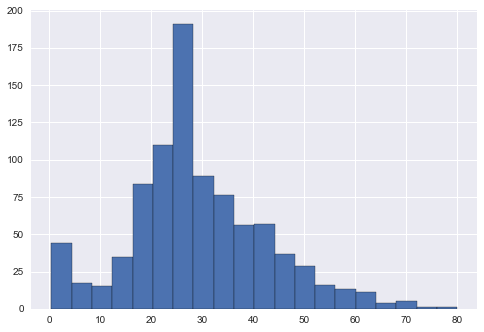

In [100]:
titanic["Age"].hist(edgecolor='black', bins=20)
plt.show()

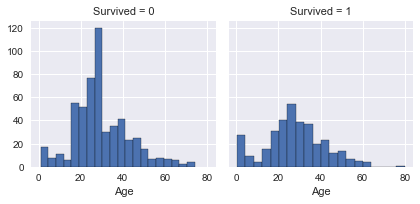

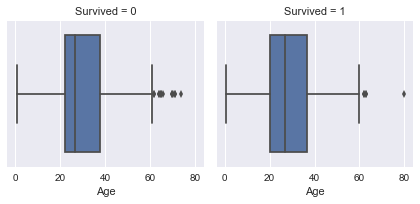

In [101]:
g = sns.FacetGrid(titanic, col="Survived")
g.map(plt.hist,"Age",edgecolor='black',bins=20)
plt.show()
g = sns.FacetGrid(titanic, col="Survived")
g.map(sns.boxplot,"Age")
plt.show()

In [102]:
age1 = (titanic["Age"]>0) & (titanic["Age"]<=12)
age2 = (titanic["Age"]>12) & (titanic["Age"]<=20)
age3 = (titanic["Age"]>20) & (titanic["Age"]<=40)
age4 = (titanic["Age"]>40) & (titanic["Age"]<=50)
age5 = (titanic["Age"]>50) & (titanic["Age"]<=63)
age6 = (titanic["Age"]>63)

In [103]:
titanic.loc[age1,"AgeGroup"] = 1
titanic.loc[age2,"AgeGroup"] = 2
titanic.loc[age3,"AgeGroup"] = 3
titanic.loc[age4,"AgeGroup"] = 4
titanic.loc[age5,"AgeGroup"] = 5
titanic.loc[age6,"AgeGroup"] = 6

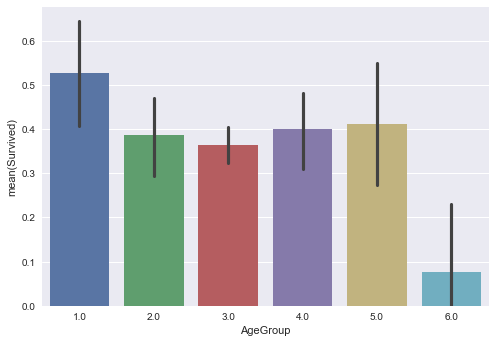

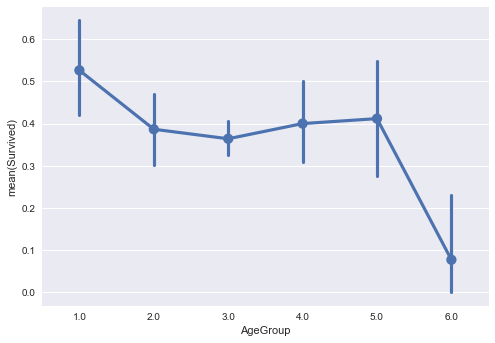

In [104]:
sns.barplot(x="AgeGroup", y="Survived", data=titanic)
plt.show()
sns.pointplot(x="AgeGroup", y="Survived", data=titanic)
plt.show()

In [105]:
age1 = (test["Age"]>0) & (test["Age"]<=12)
age2 = (test["Age"]>12) & (test["Age"]<=20)
age3 = (test["Age"]>20) & (test["Age"]<=40)
age4 = (test["Age"]>40) & (test["Age"]<=50)
age5 = (test["Age"]>50) & (test["Age"]<=63)
age6 = (test["Age"]>63)

In [106]:
test.loc[age1,"AgeGroup"] = 1
test.loc[age2,"AgeGroup"] = 2
test.loc[age3,"AgeGroup"] = 3
test.loc[age4,"AgeGroup"] = 4
test.loc[age5,"AgeGroup"] = 5
test.loc[age6,"AgeGroup"] = 6

In [107]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            891 non-null object
Embarked         891 non-null object
AgeGroup         891 non-null float64
Familysize       891 non-null int64
Familysizegrp    891 non-null float64
transFare        891 non-null float64
Faregrp          891 non-null float64
Deck             891 non-null object
Title            891 non-null category
Title_num        891 non-null int8
Tickettype       891 non-null object
traintest        891 non-null object
dtypes: category(1), float64(6), int64(6), int8(1), object(8)
memory usage: 141.1

In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             418 non-null float64
Cabin            418 non-null object
Embarked         418 non-null object
Familysize       418 non-null int64
Familysizegrp    418 non-null float64
transFare        418 non-null float64
Faregrp          418 non-null float64
Deck             418 non-null object
Title            418 non-null object
Title_num        418 non-null int64
Tickettype       418 non-null object
traintest        418 non-null object
AgeGroup         418 non-null float64
dtypes: float64(6), int64(6), object(9)
memory usage: 68.7+ KB


### Removing the columns that are not going to be used the predictive model. 
Drop the columns(Name, Age, SibSp, Parch, Ticket, Fare, Cabin, Familysize, transFare, Title, traintest)

In [109]:
titanic = titanic.drop(['Name','Age','SibSp','Parch','Ticket','Fare','Cabin','Familysize','transFare','Title','traintest'], axis=1)

In [110]:
test = test.drop(['Name','Age','SibSp','Parch','Ticket','Fare','Cabin','Familysize','transFare','Title','traintest'], axis=1)

In [111]:
titanic

,PassengerId,Survived,Pclass,Sex,Embarked,AgeGroup,Familysizegrp,Faregrp,Deck,Title_num,Tickettype
0,1,0,3,male,S,3.0,2.0,2.0,n,10,A
1,2,1,1,female,C,3.0,2.0,2.0,C,11,PC
2,3,1,3,female,S,3.0,1.0,2.0,n,9,STON/O2
3,4,1,1,female,S,3.0,2.0,2.0,C,11,REG
4,5,0,3,male,S,3.0,1.0,2.0,n,10,REG
5,6,0,3,male,Q,3.0,1.0,2.0,n,10,REG
6,7,0,1,male,S,5.0,1.0,2.0,E,10,REG
7,8,0,3,male,S,1.0,3.0,2.0,n,8,REG
8,9,1,3,female,S,3.0,2.0,2.0,n,11,REG
9,10,1,2,female,C,2.0,2.0,2.0,n,11,REG


## PREPROCESSING CATEGORICAL VARIABLES

In [112]:
make_binary = ['Pclass','Sex','Embarked','AgeGroup','Familysizegrp','Faregrp','Deck','Title_num','Tickettype']
def binarydf(df,features):
    for feat in features:
        tempdf = pd.get_dummies(df[feat],prefix=feat)
        df = pd.concat([df,tempdf],axis=1)
        df = df.drop(feat,axis=1)
    return df

titanic_pro = binarydf(titanic,make_binary)

In [113]:
titanic_pro

,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Tickettype_P,Tickettype_PC,Tickettype_REG,Tickettype_S,Tickettype_SC/PARIS,Tickettype_SOC,Tickettype_SOTON/OQ,Tickettype_STON/O2,Tickettype_W/C,Tickettype_WE/P
0,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4,1,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,5,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,6,0,0,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6,7,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7,8,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8,9,1,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9,10,1,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [114]:
#Drop "Sex_female" because it is redundant
titanic_pro = titanic_pro.drop("Sex_female", axis=1)

## MODEL SELECTION AND PREDICTION ERRORS

In [115]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [116]:
features = titanic_pro.columns
features = list(features)
features.remove("PassengerId")
features.remove("Survived")
features

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'AgeGroup_1.0',
 'AgeGroup_2.0',
 'AgeGroup_3.0',
 'AgeGroup_4.0',
 'AgeGroup_5.0',
 'AgeGroup_6.0',
 'Familysizegrp_1.0',
 'Familysizegrp_2.0',
 'Familysizegrp_3.0',
 'Faregrp_1.0',
 'Faregrp_2.0',
 'Faregrp_3.0',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_T',
 'Deck_n',
 'Title_num_0',
 'Title_num_1',
 'Title_num_2',
 'Title_num_3',
 'Title_num_4',
 'Title_num_5',
 'Title_num_6',
 'Title_num_7',
 'Title_num_8',
 'Title_num_9',
 'Title_num_10',
 'Title_num_11',
 'Title_num_12',
 'Title_num_13',
 'Tickettype_A',
 'Tickettype_C',
 'Tickettype_FC',
 'Tickettype_FCC',
 'Tickettype_P',
 'Tickettype_PC',
 'Tickettype_REG',
 'Tickettype_S',
 'Tickettype_SC/PARIS',
 'Tickettype_SOC',
 'Tickettype_SOTON/OQ',
 'Tickettype_STON/O2',
 'Tickettype_W/C',
 'Tickettype_WE/P']

### Creating Folds

In [117]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

### LOGISTIC REGRESSION

In [118]:
logreg = LogisticRegression()
acc = cross_val_score(logreg, titanic_pro[features], titanic_pro['Survived'], scoring='accuracy', cv=10)
logreg_acc = np.mean(acc)
print(logreg_acc)

0.835040290546


### RANDOM FORESTS

In [119]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':range(10,300,10), 'min_samples_leaf':range(1,11)}]

In [120]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf,param_grid,cv=5,scoring='accuracy')
grid_search.fit(titanic_pro[features], titanic_pro['Survived'])

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': range(10, 300, 10), 'min_samples_leaf': range(1, 11)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [121]:
grid_search.best_params_

{'min_samples_leaf': 2, 'n_estimators': 250}

In [122]:
rfclf = RandomForestClassifier(n_estimators=190,min_samples_leaf=3,random_state=1)
acc = cross_val_score(rfclf, titanic_pro[features], titanic_pro['Survived'], scoring='accuracy', cv=10)
rf_acc = np.mean(acc)
print(rf_acc)

0.829446998071


### K NEAREST NEIGHBORS

In [123]:
knn = KNeighborsClassifier(n_neighbors=20)
acc = cross_val_score(knn,titanic_pro[features], titanic_pro['Survived'], scoring='accuracy', cv=5)
knn_acc = np.mean(acc)
print(knn_acc)

0.805847888511


### SUPPORT VECTOR MACHINES

In [124]:
svc = SVC(probability=True)
acc = cross_val_score(svc,titanic_pro[features], titanic_pro['Survived'], scoring='accuracy', cv=15)
svc_acc = np.mean(acc)
print(svc_acc)

0.830624715891


### NAIVE BAYES

In [125]:
nb = GaussianNB()
acc = cross_val_score(nb,titanic_pro[features], titanic_pro['Survived'], scoring='accuracy', cv=10)
nb_acc = np.mean(acc)
print(nb_acc)

0.510661956645


**From the above evaluation, it seems like LOGISTIC REGRESSION is the best performing model with SUPPORT VECTOR MACHINES coming a close second. We will use this on the test set.**

In [126]:
test

,PassengerId,Pclass,Sex,Embarked,Familysizegrp,Faregrp,Deck,Title_num,Tickettype,AgeGroup
0,892,3,male,Q,1.0,1.0,n,10,REG,3.0
1,893,3,female,S,2.0,1.0,n,11,REG,4.0
2,894,2,male,Q,1.0,2.0,n,10,REG,5.0
3,895,3,male,S,1.0,2.0,n,10,REG,3.0
4,896,3,female,S,2.0,2.0,n,11,REG,3.0
5,897,3,male,S,1.0,2.0,n,10,REG,2.0
6,898,3,female,Q,1.0,1.0,n,9,REG,3.0
7,899,2,male,S,2.0,2.0,n,10,REG,3.0
8,900,3,female,C,1.0,1.0,n,11,REG,2.0
9,901,3,male,S,2.0,2.0,n,10,A,3.0


### PRE-PROCESSING THE TEST SET

In [127]:
test_pro = binarydf(test,make_binary)

In [128]:
test_pro

,PassengerId,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_1.0,...,Tickettype_P,Tickettype_PC,Tickettype_REG,Tickettype_S,Tickettype_SC/PARIS,Tickettype_SOC,Tickettype_SOTON/OQ,Tickettype_STON/O2,Tickettype_W/C,Tickettype_WE/P
0,892,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,893,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,894,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,895,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,896,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5,897,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6,898,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7,899,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8,900,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,901,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# Drop the "Sex_female" column because it is redundant
test_pro = test_pro.drop("Sex_female", axis=1)

### MAKING FINAL PREDICTIONS

In [130]:
features_tst = test_pro.columns
features_tst = list(features_tst)
features_tst.remove("PassengerId")
features_tst

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'AgeGroup_1.0',
 'AgeGroup_2.0',
 'AgeGroup_3.0',
 'AgeGroup_4.0',
 'AgeGroup_5.0',
 'AgeGroup_6.0',
 'Familysizegrp_1.0',
 'Familysizegrp_2.0',
 'Familysizegrp_3.0',
 'Faregrp_1.0',
 'Faregrp_2.0',
 'Faregrp_3.0',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_n',
 'Title_num_1',
 'Title_num_3',
 'Title_num_4',
 'Title_num_8',
 'Title_num_9',
 'Title_num_10',
 'Title_num_11',
 'Title_num_12',
 'Tickettype_A',
 'Tickettype_C',
 'Tickettype_FC',
 'Tickettype_FCC',
 'Tickettype_P',
 'Tickettype_PC',
 'Tickettype_REG',
 'Tickettype_S',
 'Tickettype_SC/PARIS',
 'Tickettype_SOC',
 'Tickettype_SOTON/OQ',
 'Tickettype_STON/O2',
 'Tickettype_W/C',
 'Tickettype_WE/P']

In [131]:
set(features_tst)-set(features)

set()

In [132]:
set(features)-set(features_tst)

{'Deck_T',
 'Title_num_0',
 'Title_num_13',
 'Title_num_2',
 'Title_num_5',
 'Title_num_6',
 'Title_num_7'}

- From the above we can see that our processed test dataframe is missing a few features that are present in the processed titanic dataframe.
- Let's add the above features to our processed test dataframe and assign 0 in the values.

In [133]:
missing_feat = list(set(features)-set(features_tst))
for itm in missing_feat:
    test_pro[itm] = 0

In [143]:
#logregtest = LogisticRegression()
#logregtest.fit(titanic_pro[features],titanic_pro["Survived"])
#test_pro["Survived"] = logregtest.predict(test_pro[features])

#ranfor = RandomForestClassifier(n_estimators=250,min_samples_leaf=2,random_state=42)
#ranfor.fit(titanic_pro[features],titanic_pro["Survived"])
#test_pro["Survived"] = ranfor.predict(test_pro[features])

svctst = SVC(probability=True)
svctst.fit(titanic_pro[features],titanic_pro["Survived"])
test_pro["Survived"] = svctst.predict(test_pro[features])

In [144]:
submission = test_pro.drop(features, axis=1)
submission.set_index('PassengerId',inplace=True)

In [145]:
submission.to_csv("rsrigiri_submission.csv")